In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
assets= ['BBRI.JK', 'ASII.JK']

In [178]:
data = pd.DataFrame()
for t in assets:
    data[t] = wb.DataReader(t, "yahoo", start='2009-01-01')['Adj Close']

In [179]:
data.tail()

,BBRI.JK,ASII.JK
Date,,
2019-02-18,3840.0,7875.0
2019-02-19,3910.0,7775.0
2019-02-20,3890.0,7775.0
2019-02-21,3910.0,7700.0
2019-02-22,3900.0,7625.0


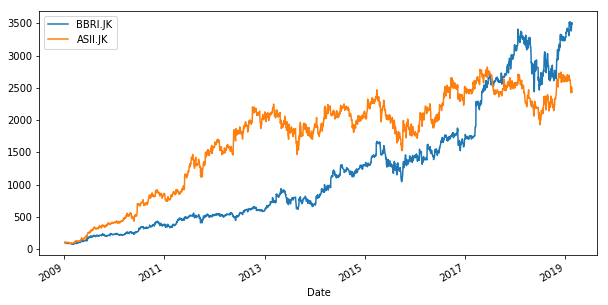

In [180]:
(data / data.iloc[0] * 100).plot(figsize=(10, 5))

In [181]:
log_returns = np.log(data / data.shift(1))

In [182]:
log_returns.mean() *250

BBRI.JK    0.354611
ASII.JK    0.318391
dtype: float64

In [183]:
log_returns.cov() * 250

,BBRI.JK,ASII.JK
BBRI.JK,0.142244,0.057695
ASII.JK,0.057695,0.134823


In [184]:
log_returns.corr() * 250

,BBRI.JK,ASII.JK
BBRI.JK,250.000000,104.154294
ASII.JK,104.154294,250.000000


In [185]:
num_assets = len(assets)

In [186]:
num_assets

2

In [187]:
arr = np.random.random(num_assets)

In [188]:
arr[0] + arr[1]

1.3690918341700664

In [189]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.15426245, 0.84573755])

In [190]:
weights[0] + weights[1]

1.0

### Expected portfolio return 

In [191]:
np.sum(weights * log_returns.mean()) * 250

0.32397855477914067

### Expected portfolio variance

In [192]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.11487422854344968

### Expected portfolio volatility

In [193]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.338931008530423

In [194]:
pfolio_return = []
pfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_return.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_return, pfolio_volatilities

([0.3436647181591832,
  0.35001010657375276,
  0.33810774316230924,
  0.33611394355091545,
  0.33391559752206845,
  0.34756735361415736,
  0.3344618083637276,
  0.31951364011240807,
  0.3360428115732162,
  0.3356169848010209,
  0.3459712476611257,
  0.3238600833970912,
  0.3340071023929333,
  0.3507937763840976,
  0.3515381367586159,
  0.33210325623676923,
  0.350106453763998,
  0.34565689841071245,
  0.32252415812095514,
  0.3267665740671524,
  0.3269220954156657,
  0.33532887717110565,
  0.32752585641136234,
  0.34099810227003907,
  0.3263895944011549,
  0.33476751658646997,
  0.32133306773574716,
  0.33939807350034873,
  0.3444574509356989,
  0.3519461563142932,
  0.3338578947584083,
  0.34692406175321067,
  0.3498726148372668,
  0.3382864452349225,
  0.34039455682587666,
  0.32071031025643626,
  0.3269319880114945,
  0.33090072641113705,
  0.33833467673891604,
  0.33488456139923517,
  0.33806069675796985,
  0.3336875423928249,
  0.3447753515729296,
  0.3507437249635009,
  0.3186116

In [195]:
pfolio_return = []
pfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_return.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_return = np.array(pfolio_return)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_return, pfolio_volatilities

(array([0.3461277 , 0.33592926, 0.3355845 , 0.33376137, 0.33025301,
        0.33502576, 0.34505654, 0.32826901, 0.32334736, 0.32237218,
        0.33670932, 0.33757268, 0.3519089 , 0.34252896, 0.33785104,
        0.32561027, 0.34881619, 0.34134247, 0.34536727, 0.3285627 ,
        0.35141688, 0.33720752, 0.33987336, 0.32717877, 0.33595873,
        0.3305047 , 0.32520091, 0.33676654, 0.32033431, 0.34906712,
        0.34149444, 0.34953899, 0.32209318, 0.33132236, 0.32610408,
        0.33057124, 0.32820297, 0.33252844, 0.33124208, 0.34553135,
        0.32696778, 0.34028063, 0.33095534, 0.32768042, 0.34197348,
        0.34514912, 0.34848734, 0.32316552, 0.33263117, 0.33184325,
        0.34661895, 0.32705044, 0.32526142, 0.33784314, 0.32779373,
        0.33373002, 0.33635076, 0.33312375, 0.34351682, 0.33415571,
        0.33427528, 0.34613215, 0.34819385, 0.32713333, 0.34678491,
        0.32963438, 0.32992053, 0.35014973, 0.32955117, 0.3301487 ,
        0.32630817, 0.33075836, 0.33994241, 0.33

In [196]:
portfolios = pd.DataFrame({'returns': pfolio_return, 'volatility': pfolio_volatilities})

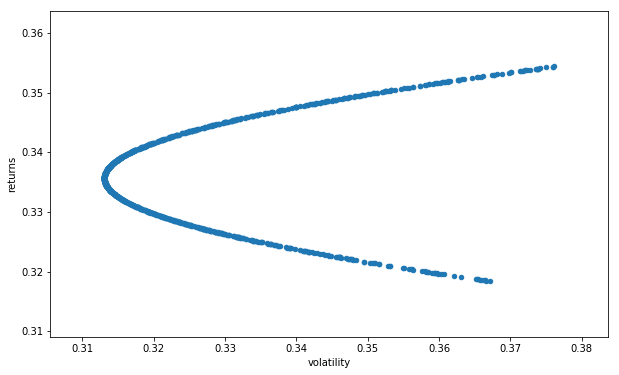

In [197]:
portfolios.plot(x='volatility', y='returns', kind='scatter', figsize=(10, 6))
plt.xlabel = 'expected Volatility'
plt.ylabel = 'expected returns'

### Experiment more than 2 assets 

In [151]:
assets1= ['BBRI.JK', 'ASII.JK','INDF.JK','PTBA.JK', 'KLBF.JK', 'TLKM.JK', 'UNTR.JK', "SMGR.JK",'TBLA.JK']

In [152]:
data1 = pd.DataFrame()
for t in assets1:
    data1[t] = wb.DataReader(t, "yahoo", start='2009-01-01')['Adj Close']

In [153]:
data1.tail()

,BBRI.JK,ASII.JK,INDF.JK,PTBA.JK,KLBF.JK,TLKM.JK,UNTR.JK,SMGR.JK,TBLA.JK
Date,,,,,,,,,
2019-02-18,3840.0,7875.0,7625.0,3980.0,1575.0,3900.0,26150.0,12500.0,880.0
2019-02-19,3910.0,7775.0,7500.0,4200.0,1550.0,3920.0,26050.0,12475.0,885.0
2019-02-20,3890.0,7775.0,7500.0,4160.0,1545.0,3870.0,26000.0,12900.0,885.0
2019-02-21,3910.0,7700.0,7550.0,4200.0,1530.0,3870.0,26500.0,12925.0,880.0
2019-02-22,3900.0,7625.0,7625.0,4130.0,1510.0,3840.0,27950.0,12575.0,880.0


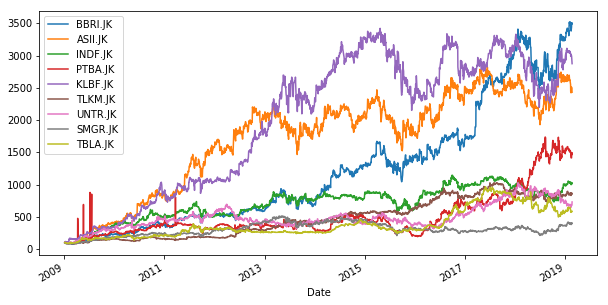

In [154]:
(data1 / data1.iloc[0] * 100).plot(figsize=(10, 5))

In [155]:
log_returns = np.log(data1 / data1.shift(1))

In [156]:
log_returns.mean() *250

BBRI.JK    0.354611
ASII.JK    0.318391
INDF.JK    0.229500
PTBA.JK    0.268014
KLBF.JK    0.322696
TLKM.JK    0.209246
UNTR.JK    0.195383
SMGR.JK    0.129157
TBLA.JK    0.176131
dtype: float64

In [157]:
log_returns.cov() * 250

,BBRI.JK,ASII.JK,INDF.JK,PTBA.JK,KLBF.JK,TLKM.JK,UNTR.JK,SMGR.JK,TBLA.JK
BBRI.JK,0.142244,0.057695,0.048398,0.030285,0.046919,0.039535,0.057111,0.052428,0.038950
ASII.JK,0.057695,0.134823,0.046554,0.013051,0.036666,0.033377,0.059051,0.049937,0.033581
INDF.JK,0.048398,0.046554,0.110474,0.016365,0.043315,0.030992,0.047935,0.041864,0.038605
PTBA.JK,0.030285,0.013051,0.016365,2.344666,0.030588,0.046253,0.044850,0.036534,0.025383
KLBF.JK,0.046919,0.036666,0.043315,0.030588,0.127984,0.029983,0.039939,0.039360,0.026296
TLKM.JK,0.039535,0.033377,0.030992,0.046253,0.029983,0.098586,0.034588,0.033956,0.022331
UNTR.JK,0.057111,0.059051,0.047935,0.044850,0.039939,0.034588,0.165604,0.046058,0.043947
SMGR.JK,0.052428,0.049937,0.041864,0.036534,0.039360,0.033956,0.046058,0.125282,0.033308
TBLA.JK,0.038950,0.033581,0.038605,0.025383,0.026296,0.022331,0.043947,0.033308,0.129006


In [158]:
log_returns.corr() * 250

,BBRI.JK,ASII.JK,INDF.JK,PTBA.JK,KLBF.JK,TLKM.JK,UNTR.JK,SMGR.JK,TBLA.JK
BBRI.JK,250.000000,104.154294,96.486601,13.110219,87.078492,83.632824,92.992942,98.347523,71.883097
ASII.JK,104.154294,250.000000,95.497424,5.803176,70.029916,72.531035,98.936784,96.399717,63.657770
INDF.JK,96.486601,95.497424,250.000000,8.247136,91.468069,75.785595,88.598387,89.353212,80.911565
PTBA.JK,13.110219,5.803176,8.247136,250.000000,48.242260,65.567139,18.460974,58.238030,11.538028
KLBF.JK,87.078492,70.029916,91.468069,48.242260,250.000000,67.821565,68.934166,77.709291,51.257386
TLKM.JK,83.632824,72.531035,75.785595,65.567139,67.821565,250.000000,69.131271,77.633266,49.555300
UNTR.JK,92.992942,98.936784,88.598387,18.460974,68.934166,69.131271,250.000000,80.347973,75.229568
SMGR.JK,98.347523,96.399717,89.353212,58.238030,77.709291,77.633266,80.347973,250.000000,65.621335
TBLA.JK,71.883097,63.657770,80.911565,11.538028,51.257386,49.555300,75.229568,65.621335,250.000000


In [160]:
num_assets = len(assets1)
num_assets

9

In [161]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.11811142, 0.10175333, 0.17468836, 0.06610146, 0.07057996,
       0.12274595, 0.22063365, 0.06468922, 0.06069665])

In [165]:
expected_return = np.sum(weights * log_returns.mean()) * 250
expected_return

0.24270191689102966

In [166]:
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
expected_volatility

0.2532952870034553

In [167]:
pfolio_return = []
pfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_return.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_return = np.array(pfolio_return)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_return, pfolio_volatilities

(array([0.26720262, 0.20224502, 0.24984465, 0.24817735, 0.22131843,
        0.23468369, 0.22019198, 0.22067126, 0.25000714, 0.25147594,
        0.25844769, 0.25898751, 0.27398768, 0.25464196, 0.22474567,
        0.2369477 , 0.24733009, 0.2437254 , 0.26300629, 0.23791734,
        0.22721183, 0.21444865, 0.24580318, 0.23684216, 0.26043646,
        0.26081288, 0.22556325, 0.23868483, 0.26487041, 0.2532612 ,
        0.2299335 , 0.25049374, 0.22568494, 0.23579308, 0.22092121,
        0.2435718 , 0.22169695, 0.25727651, 0.23280368, 0.25929963,
        0.22643671, 0.2158516 , 0.24577733, 0.24794123, 0.2419944 ,
        0.24836067, 0.25903221, 0.25081253, 0.22648698, 0.25181984,
        0.22580043, 0.21775591, 0.24066537, 0.22883753, 0.24408961,
        0.20916199, 0.22881741, 0.22410869, 0.25321406, 0.24446072,
        0.26270755, 0.22867002, 0.26403108, 0.24713697, 0.24184798,
        0.23977994, 0.24223698, 0.2320957 , 0.25050819, 0.25119413,
        0.24447442, 0.23295364, 0.2611298 , 0.24

In [169]:
portfolios = pd.DataFrame({'returns': pfolio_return, 'volatility': pfolio_volatilities})

In [170]:
portfolios.head()

,returns,volatility
0,0.267203,0.337188
1,0.202245,0.238512
2,0.249845,0.237594
3,0.248177,0.386186
4,0.221318,0.240520


In [171]:
portfolios.tail()

,returns,volatility
995,0.254592,0.248367
996,0.257209,0.243777
997,0.225525,0.384364
998,0.258028,0.258130
999,0.240666,0.363798


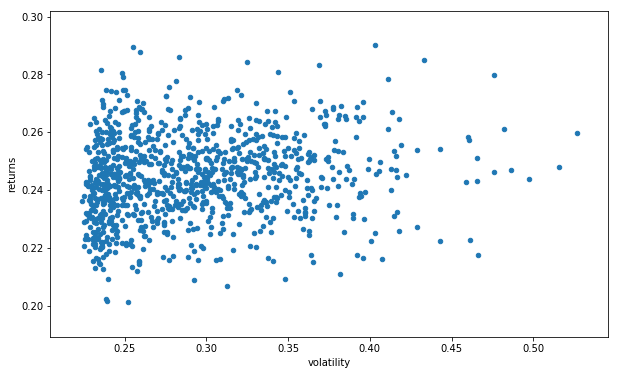

In [175]:
portfolios.plot(x='volatility', y='returns', kind='scatter', figsize=(10, 6))
plt.xlabel = 'expected Volatility'
plt.ylabel = 'expected returns'